In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Dummy Data HSS.csv")
df = df.replace([np.inf, -np.inf], np.nan).dropna()#remove nan and infinity rows

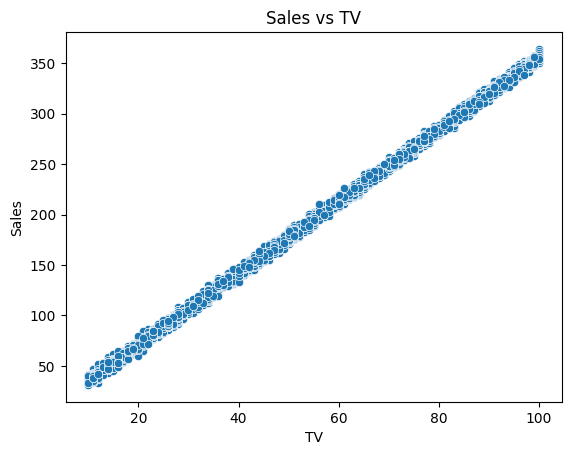

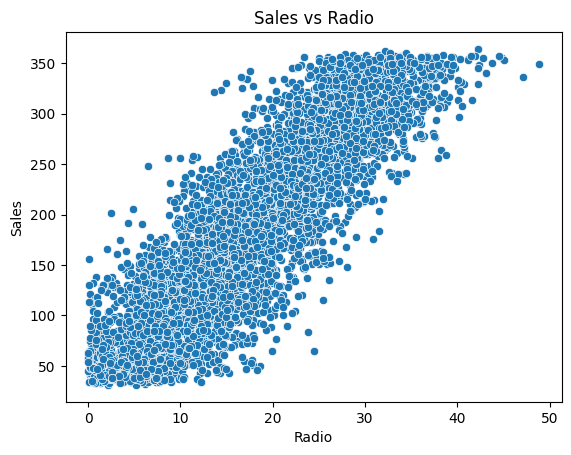

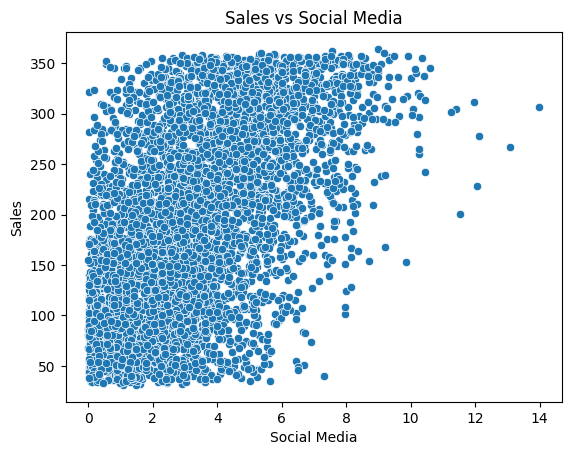

In [3]:


cols = ['TV', 'Radio','Social Media']

for col in cols:
    plt.figure()
    sns.scatterplot(x=df[col], y=df['Sales'])
    plt.xlabel(col)
    plt.ylabel('Sales')
    plt.title(f'Sales vs {col}')
    plt.show()


In [4]:
df.head
df.describe()

,TV,Radio,Social Media,Sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54.062912,18.157533,3.323473,192.413332
std,26.104942,9.663260,2.211254,93.019873
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.555355,1.530822,112.434612
50%,53.000000,17.859513,3.055565,188.963678
75%,77.000000,25.640603,4.804919,272.324236
max,100.000000,48.871161,13.981662,364.079751


In [5]:
X = df[['TV','Radio','Social Media']]
X['Bias'] = 1
X.head(10)

Y = df[['Sales']]
Y.head(10)

/tmp/ipykernel_45439/1278927232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Bias'] = 1


,Sales
0,54.732757
1,46.677897
2,150.177829
3,298.246340
4,56.594181
5,105.889148
6,198.679825
7,108.733932
8,270.189400
9,48.280582


In [ ]:
T = len(df)
train = 0.8
test = 1 - train
X_train = (X.loc[:T*train])#train-test split
Y_train = (Y.loc[:T*train])
X_test = (X.loc[T*train+1:])
Y_test = (Y.loc[T*train+1:]).to_numpy()

In [7]:

np.isfinite(Y).all()
print(np.isnan(Y).sum())
print(np.isinf(Y).sum())
np.where(~np.isfinite(Y))


Sales    0
dtype: int64
Sales    0
dtype: int64


(array([], dtype=int64), array([], dtype=int64))

In [ ]:
def fit(X_train,Y_train,batch_size = 30, learning_rate = 0.0001,iterations = 10000,learning_rate_factor = 0.2):
    X_train = X_train.to_numpy()
    Y_train = Y_train.to_numpy()
    features = X_train.shape[1]
    data_size = len(X_train)
    #print(X_train@theta - Y_train)
    global theta#temporary to store learned paramters
    theta = np.random.rand(features,1)#initizalize random weights
    #print(np.mean((X_train @ theta - Y_train)**2))

    for i in range(iterations):
        print(i,np.mean((X_train @ theta - Y_train)**2))#print mse
        for j in range(int(data_size/batch_size)):
            error = X_train[batch_size*j:batch_size*(j+1)]@theta - Y_train[batch_size*j:batch_size*(j+1)]#find error for this batch
            error = error.reshape(-1)#convert to series
            for k in range(features):
                grad_k = np.dot(error,X_train[batch_size*j:batch_size*(j+1),k])/batch_size#find grad for this batch and feature(from differentiating equation)
                grad_k = np.clip(grad_k, -1000, 1000)#stop gradients from going insanely high
                theta[k] = theta[k] - learning_rate*grad_k/(1+i**learning_rate_factor)#update theta for feature(had to divide to stop oscillations)
                #ignore this - was to do it without using the equation and directly finding grad by finding loss at two separate values
                #print( learning_rate*grad_k)
                #dtheta = np.zeros([features,1])
                #dtheta[k] = h
                #Loss_plus = np.linalg.norm(X_train[batch_size*j:batch_size*(j+1)] @ (theta+dtheta) - Y_train[batch_size*j:batch_size*(j+1)])
                #Loss_minus = np.linalg.norm(X_train[batch_size*j:batch_size*(j+1)] @ (theta-dtheta) - Y_train[batch_size*j:batch_size*(j+1)])

            #print(batch_size*j,Loss.shape,batch_size*(j+1))

        error = X_train[batch_size*int(data_size/batch_size):] @ theta - Y_train[batch_size*int(data_size/batch_size):]#same for remaining
        error = error.reshape(-1)
        r = data_size - batch_size * int(data_size / batch_size)
        if(r == 0):#prevent division by zero
            continue
        for k in range(features):
                
                grad_k = np.dot(error,X_train[batch_size*int(data_size/batch_size):,k])/r
                grad_k = np.clip(grad_k, -1000, 1000)
                theta[k] = theta[k] - learning_rate*grad_k/(1+i**learning_rate_factor)
        #print(batch_size*int(data_size/batch_size),Loss.shape)

In [9]:
def predict(X_test):
    X = X_test.to_numpy()
    y_pred = X @ theta
    return y_pred

In [16]:
fit(X_train,Y_train,30,0.0001)
Y_pred = predict(X_test)


0 34269.938251440144
1 169.8005096503893
2 128.52030153618287
3 103.19893826448052
4 84.14107866770404
5 69.43982522166135
6 57.93244523822032
7 48.832720993336935
8 41.58083114212301
9 35.765375772537325
10 31.077462390072554
11 27.281499089845948
12 24.195625350495515
13 21.678106003501114
14 19.617607079522728
15 17.92609694817592
16 16.53357610270291
17 15.384110806682841
18 14.432814154785287
19 13.643526331233696
20 12.98701762843688
21 12.439586636321161
22 11.981959985836736
23 11.598424097901137
24 11.276136711644186
25 11.004578605387056
26 10.775115256912503
27 10.580645153645163
28 10.41531670790233
29 10.274299714507507
30 10.153600333900776
31 10.049910928973203
32 9.960487900191024
33 9.883052077989781
34 9.815707338283262
35 9.7568739770236
36 9.705234066554995
37 9.659686560701731
38 9.619310348255773
39 9.583333799745462
40 9.55110962860888
41 9.522094109575105
42 9.495829875426937
43 9.47193165719623
44 9.450074449175064
45 9.429983674392384
46 9.411427002751942
47 9

In [17]:
print(np.var(Y_train))
print(np.sqrt(np.mean((Y_pred - Y_test)**2)))#rmse on test data

Sales    8676.189444
dtype: float64
2.9970539529812026


/home/vidhaan/venvs/my_genai/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:4266: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
